Nama Ratih Kumala

NIM A11.2020.12520

## Optimasi Nilai Akurasi Penyakit Jantung Menggunakan Metode Soft Voting

## Import Library

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Menampilkan data


In [5]:
df = pd.read_csv("heart_cleveland_upload.csv")

In [12]:
df.head()

,umur,jenis kelamin,cp,tekanan darah,kolestrol,gula darah,restecg,detak jantung,"angina,",depresi,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Ubah nama data set untuk mempermudah pemrosesan

In [103]:
df.rename(index=str, columns={
    'age' : 'umur',
    'sex' : 'jenis kelamin',
    'trestbps' : 'tekanan darah',
    'chol' : 'kolestrol',
    'fbs' : 'gula darah',
    'thalach' : 'detak jantung',
    'exang' : 'angina',
    'oldpeak' : 'depresi'
},inplace=True)

df.head()

,umur,jenis kelamin,cp,tekanan darah,kolestrol,gula darah,restecg,detak jantung,"angina,",depresi,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Memisahkan atribut dengang label

In [17]:
x = df.drop(columns='condition', axis=1)
y = df['condition']

In [18]:
print(x)

     umur  jenis kelamin  cp  tekanan darah  kolestrol  gula darah  restecg  \
0      69              1   0            160        234           1        2   
1      69              0   0            140        239           0        0   
2      66              0   0            150        226           0        0   
3      65              1   0            138        282           1        2   
4      64              1   0            110        211           0        2   
..    ...            ...  ..            ...        ...         ...      ...   
292    40              1   3            152        223           0        0   
293    39              1   3            118        219           0        0   
294    35              1   3            120        198           0        0   
295    35              0   3            138        183           0        0   
296    35              1   3            126        282           0        2   

     detak jantung  angina,  depresi  slope  ca  th

data distribtion

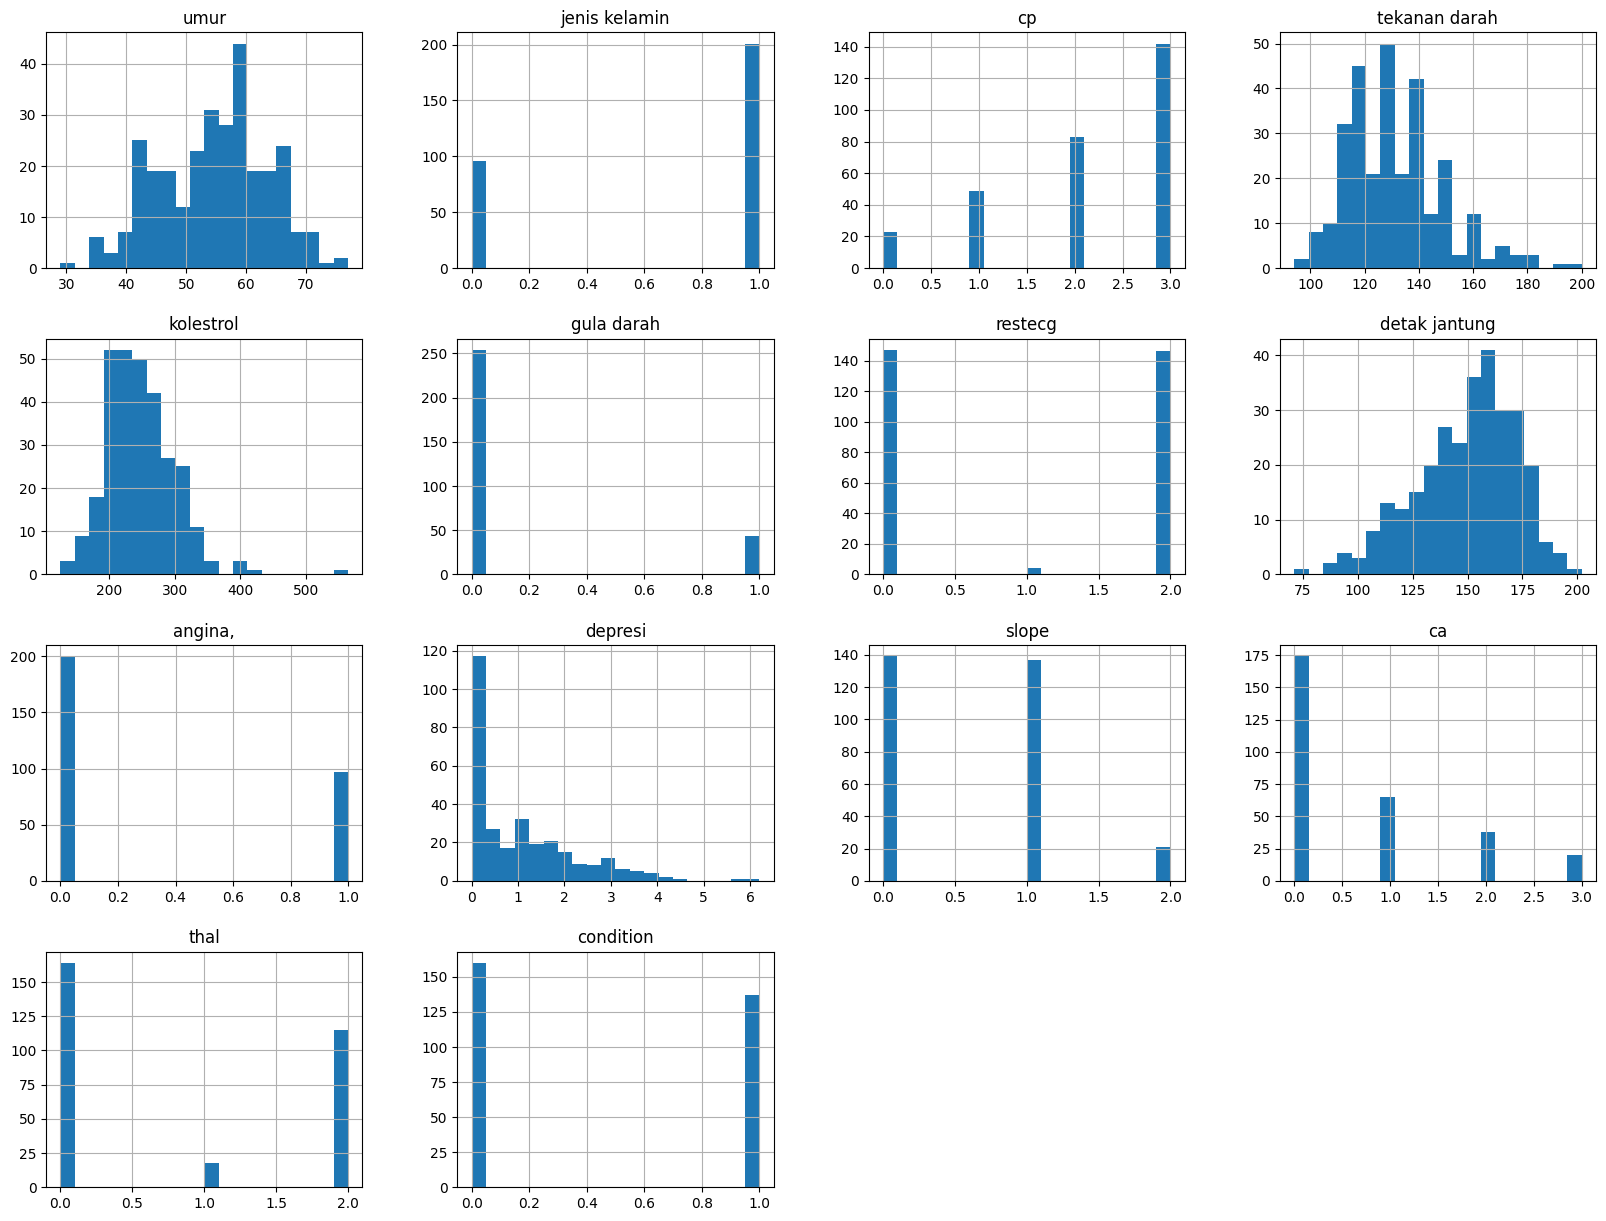

In [101]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

In [102]:
print(df.dtypes)

umur               int64
jenis kelamin      int64
cp                 int64
tekanan darah      int64
kolestrol          int64
gula darah         int64
restecg            int64
detak jantung      int64
angina,            int64
depresi          float64
slope              int64
ca                 int64
thal               int64
condition          int64
dtype: object


# Korelasi Matriks

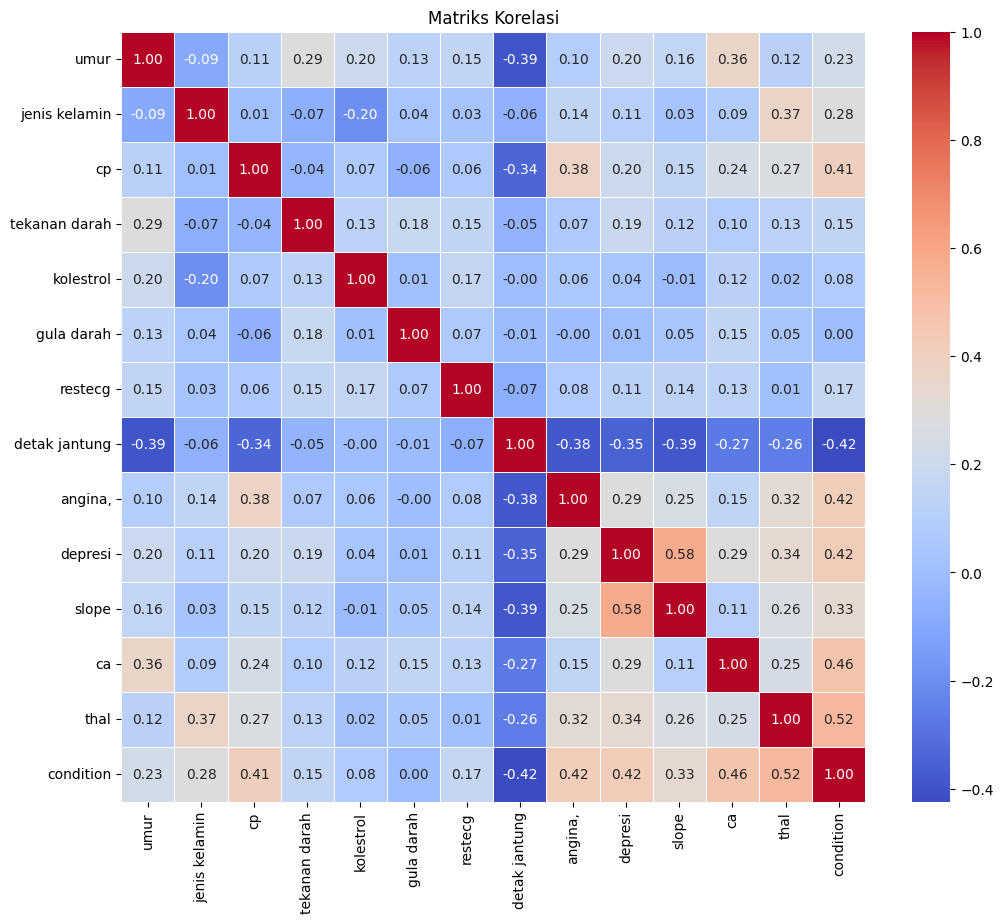

In [78]:
correlation_matrix = df.corr()

# Plotting matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

# Definisikan Langkah-langkah Preprocessing

a. Preprocessing Fitur Numerik

In [105]:
# Fitur numerik dan kategorikal
numeric_features = ['umur', 'cp', 'tekanan darah', 'kolestrol', 'gula darah', 'restecg', 'detak jantung', 'slope', 'ca', 'thal']
categorical_features = ['jenis kelamin', 'angina,', 'depresi']

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Gabungkan preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Buat pipeline lengkap
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Pisahkan data
X = df.drop('condition', axis=1)
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        48
           1       0.78      0.86      0.82        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



## Proses Learning / Modeling:

Model Gaussian Naïve Bayes dan Evaluasi

In [106]:
#pipeline lengkap
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [ ]:
pipeline.fit(X_train, y_train)
# Prediksi
y_pred = pipeline.predict(X_test)

Gaussian Naive Bayes
Accuracy: 0.8222222222222222
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        48
           1       0.78      0.86      0.82        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



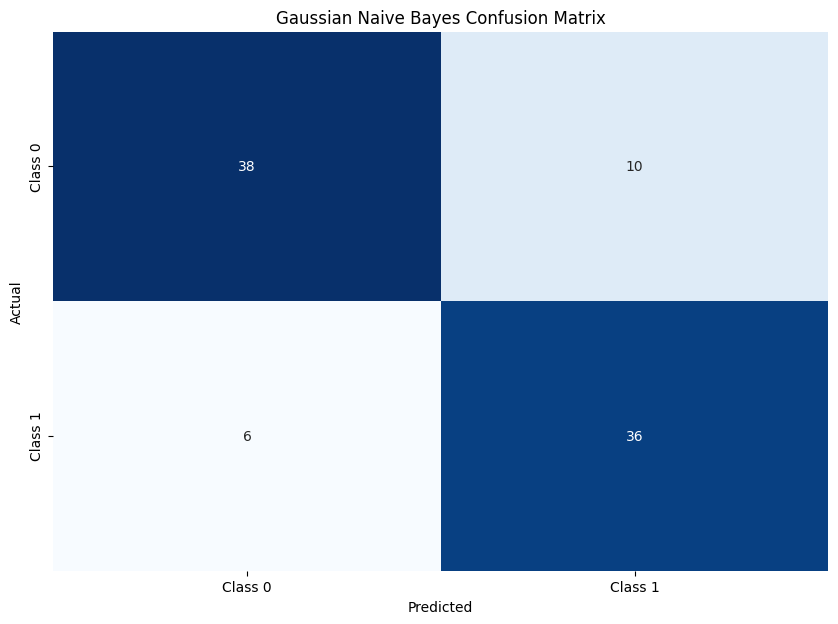

In [123]:
print("Gaussian Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix= confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

Model Decision Tree

In [124]:
# Inisialisasi model Decision Tree
model_tree = DecisionTreeClassifier(random_state=42)

# Training model
model_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Decision Tree
Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        48
           1       0.70      0.76      0.73        42

    accuracy                           0.73        90
   macro avg       0.73      0.74      0.73        90
weighted avg       0.74      0.73      0.73        90



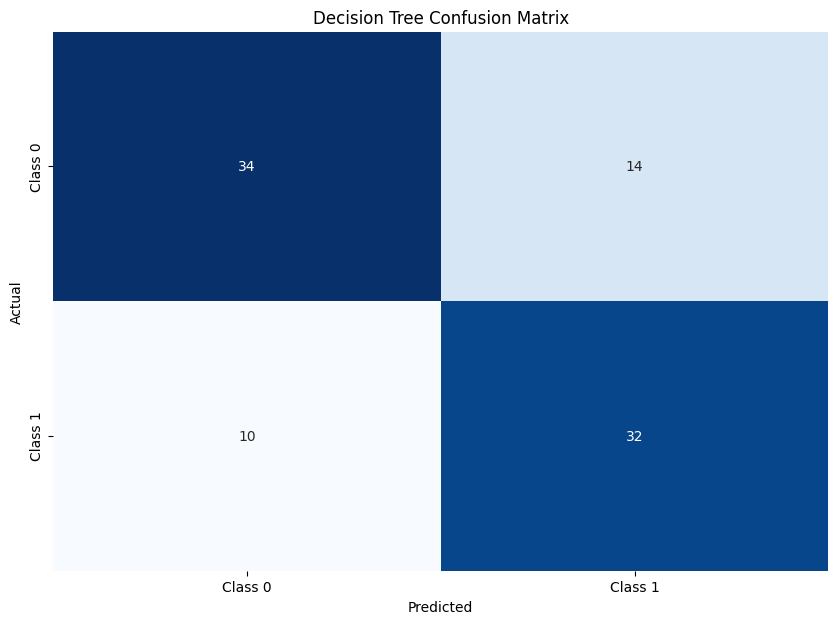

In [125]:
# Prediksi menggunakan data pengujian
y_pred_tree = model_tree.predict(X_test)

# Evaluasi model
print("Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(classification_report(y_test, y_pred_tree))

# Confusion Matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


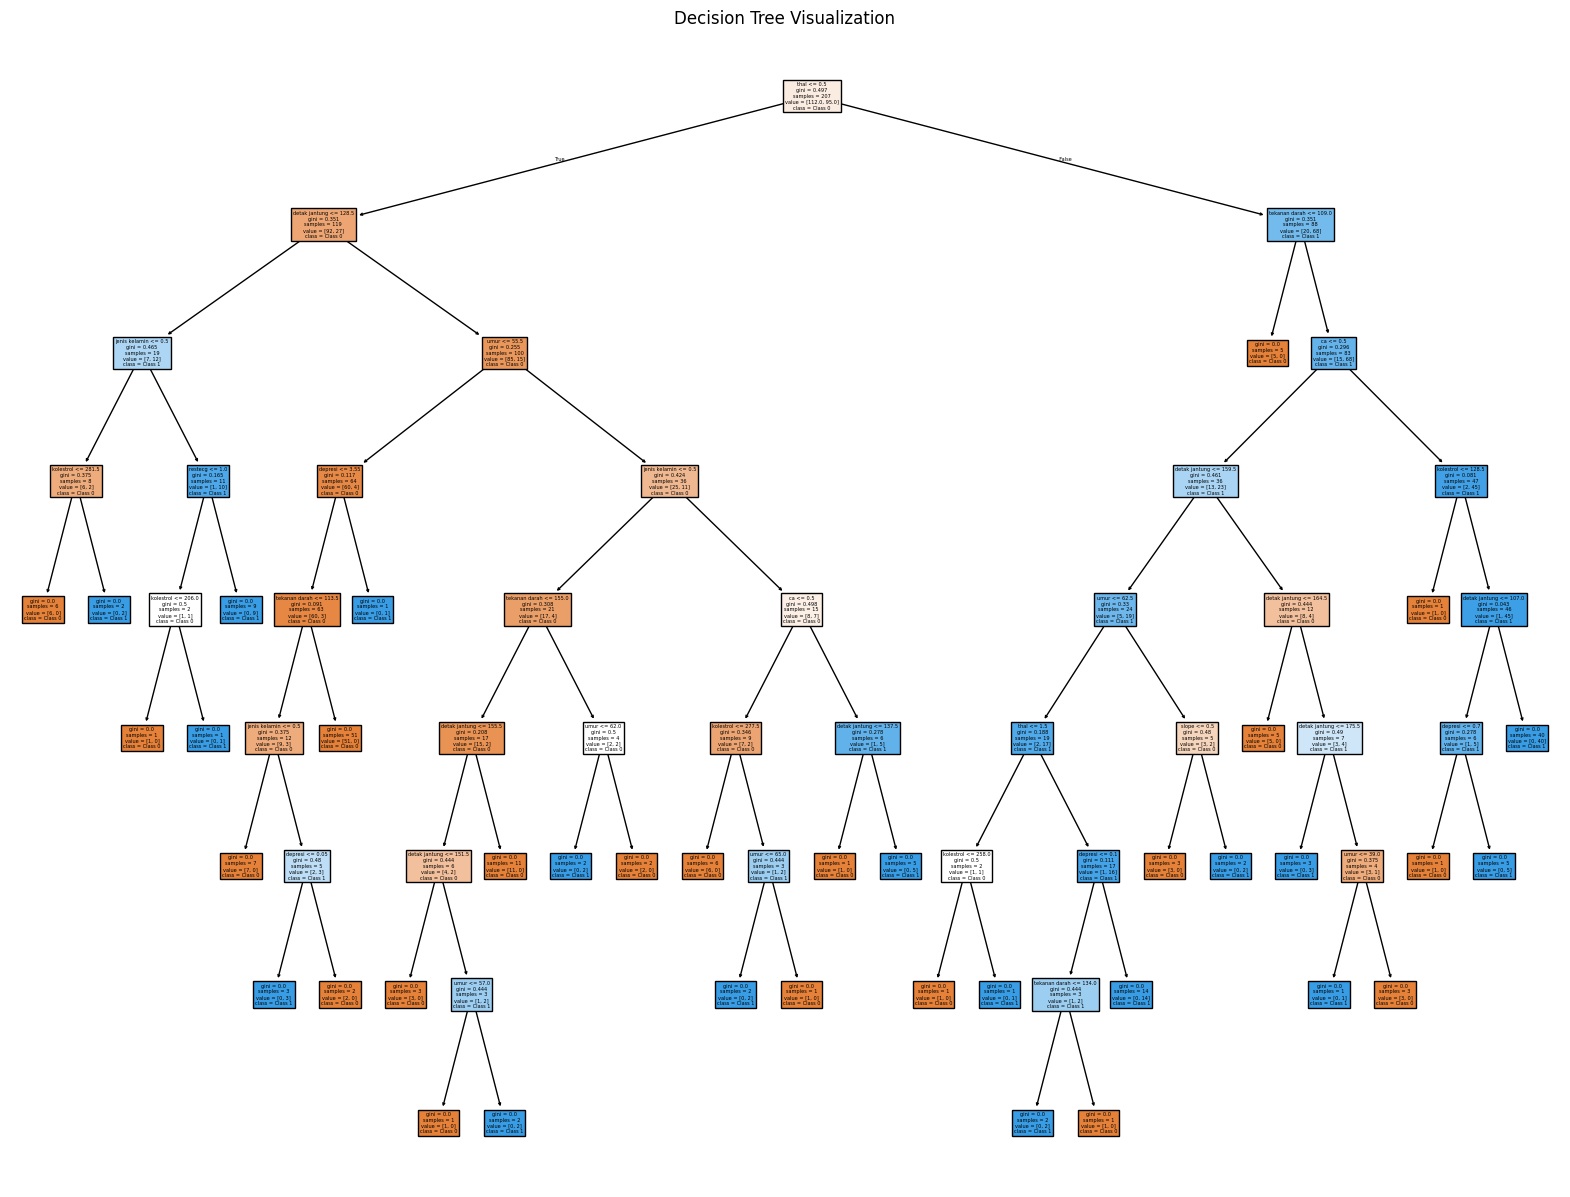

In [126]:
from sklearn.tree import plot_tree

# Visualisasi pohon keputusan
plt.figure(figsize=(20, 15))
plot_tree(model_tree, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


# Diskusi hasil dan kesimpulan

a. Akurasi Model Gaussian Naïve Bayes:

Akurasi: 0.82 (82%)
Diskusi:

Performa Umum: Dengan akurasi 82%, model Gaussian Naïve Bayes menunjukkan bahwa 82% dari prediksi model cocok dengan label sebenarnya. Ini adalah hasil yang solid dan menunjukkan bahwa model ini cukup baik dalam mengklasifikasikan data secara keseluruhan.

Kelebihan: Model ini umumnya cepat dan efisien, terutama pada dataset besar dan ketika asumsi distribusi Gaussian mendekati kenyataan.

Kekurangan: Meskipun akurasi tinggi, Gaussian Naïve Bayes mengasumsikan independensi fitur yang mungkin tidak selalu benar. Jika fitur tidak independen atau distribusi tidak normal, akurasi bisa terpengaruh.

b. Akurasi Model Decision Tree:

Akurasi: 0.73 (73%)
Diskusi:

Performa Umum: Dengan akurasi 73%, model Decision Tree menunjukkan bahwa 73% dari prediksi model cocok dengan label sebenarnya. Akurasi ini sedikit lebih rendah dibandingkan dengan Gaussian Naïve Bayes.

Kelebihan: Model Decision Tree lebih mudah untuk diinterpretasikan dan dapat menangani fitur kategorikal dengan baik. Ini dapat memberikan wawasan yang jelas tentang keputusan yang diambil model.

Kekurangan: Pohon keputusan dapat menjadi sangat kompleks dan rentan terhadap overfitting, terutama jika kedalaman pohon tidak diatur dengan baik. Overfitting dapat menyebabkan akurasi yang lebih rendah pada data pengujian dibandingkan dengan data pelatihan.


Kesimpulan
Perbandingan Akurasi:

Gaussian Naïve Bayes memiliki akurasi lebih tinggi (82%) dibandingkan dengan Decision Tree (73%). Ini menunjukkan bahwa Gaussian Naïve Bayes mungkin lebih efektif dalam memprediksi data pada dataset ini.
Decision Tree, meskipun lebih mudah diinterpretasikan, menunjukkan akurasi yang sedikit lebih rendah. Hal ini bisa jadi karena overfitting atau parameter model yang tidak optimal.